# Import Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [18]:
#connect to the data via the GitHub fork of uncle steve's sandbox
url = 'https://raw.githubusercontent.com/noriegaian/sandbox/master/data/clustering_exec.csv'
df = pd.read_csv(url)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
Age        40 non-null float64
Savings    40 non-null float64
dtypes: float64(2)
memory usage: 768.0 bytes


In [21]:
df.head()

,Age,Savings
0,40.9,76.4
1,40.1,2.2
2,37.1,1.7
3,44.5,1.4
4,29.9,89.8


In [22]:
#convert pandas df to numpy array (just easier to use with scikitlearn)
X = df.to_numpy()

In [25]:
X.shape

(40, 2)

In [27]:
#preview our data
X

array([[ 40.9,  76.4],
       [ 40.1,   2.2],
       [ 37.1,   1.7],
       [ 44.5,   1.4],
       [ 29.9,  89.8],
       [ 31.2, 101.3],
       [ 30.2,  87.3],
       [ 51.2,  10.3],
       [ 55.7,   8.3],
       [ 38.5,   0.6],
       [ 57.9, 165.2],
       [ 56.2, 179.1],
       [ 53. ,  11.5],
       [ 30.7, 107.7],
       [ 34.4,  92.7],
       [ 50.9,  10.1],
       [ 56.2, 132.9],
       [ 43.1,   1.4],
       [ 53.2,  12.3],
       [ 54.1,   7.5],
       [ 33.7, 108.6],
       [ 41.7,   1.2],
       [ 42.9,   1.4],
       [ 60.3, 152.9],
       [ 54.5, 145.9],
       [ 37.3, 106. ],
       [ 52.1, 156.7],
       [ 52.7,   8.8],
       [ 57.9, 179.9],
       [ 56.9,   8.6],
       [ 55.2,   9.4],
       [ 39.6,   2.2],
       [ 33.5,  99.4],
       [ 50.6,  10.8],
       [ 41.3,   1.8],
       [ 34.9,   1.7],
       [ 61.7, 152.4],
       [ 54.7, 156.3],
       [ 31.9,  82.1],
       [ 60.6, 158.9]])

# K-Means

<Figure size 432x288 with 0 Axes>

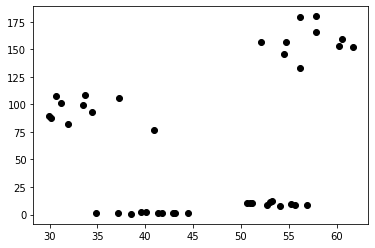

In [30]:
#let's examine our data with a plot
plt.figure()
plt.scatter(X[:,0], X[:,1], c="black") #column 1 vs column 2 (identified with indices)

In [31]:
#standardize our values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [33]:
X #here's our scaled data

array([[-0.51612539,  0.15805912],
       [-0.59591289, -0.98251823],
       [-0.89511601, -0.99020406],
       [-0.15708164, -0.99481556],
       [-1.61320351,  0.36403939],
       [-1.48354882,  0.54081351],
       [-1.5832832 ,  0.32561024],
       [ 0.51113867, -0.85800776],
       [ 0.95994336, -0.88875109],
       [-0.75548789, -1.00711289],
       [ 1.17935898,  1.52306274],
       [ 1.00981054,  1.73672884],
       [ 0.69066054, -0.83956177],
       [-1.53341601,  0.63919215],
       [-1.16439882,  0.40861721],
       [ 0.48121836, -0.8610821 ],
       [ 1.00981054,  1.02655804],
       [-0.29670976, -0.99481556],
       [ 0.71060742, -0.82726444],
       [ 0.80036836, -0.90104842],
       [-1.23421289,  0.65302665],
       [-0.43633789, -0.99788989],
       [-0.31665664, -0.99481556],
       [ 1.41872148,  1.33399129],
       [ 0.84026211,  1.22638965],
       [-0.87516914,  0.61306032],
       [ 0.60089961,  1.39240361],
       [ 0.66074023, -0.88106526],
       [ 1.17935898,

In [35]:
#K-Means algorithm
from sklearn.cluster import KMeans
k_means = KMeans(init='k-means++', n_clusters=4, n_init=10, random_state=42)

In [36]:
#now fit the algorithm to our data
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [38]:
#view the clusters that each instance has been assigned to
k_means.labels_

array([2, 3, 3, 3, 2, 2, 2, 0, 0, 3, 1, 1, 0, 2, 2, 0, 1, 3, 0, 0, 2, 3,
       3, 1, 1, 2, 1, 0, 1, 0, 0, 3, 2, 0, 3, 3, 1, 1, 2, 1])

In [40]:
#view the cluster centres
k_means.cluster_centers_ #here we get back a 4x2 array
#observations: notice that these are hard to interpret since our features
#have been standardized

array([[ 0.72556758, -0.86630846],
       [ 1.11054226,  1.4126942 ],
       [-1.26712523,  0.44597035],
       [-0.56898461, -0.99235609]])

In [54]:
#inverse scaling
scaler.inverse_transform(k_means.cluster_centers_)
#observations: now we have cluster centres that are easier to interpret
#(e.g., age of 53.35 and savings of 9.76)

array([[ 53.35,   9.76],
       [ 57.21, 158.02],
       [ 33.37,  95.13],
       [ 40.37,   1.56]])

In [62]:
#use elbow method to identify k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

<Figure size 720x288 with 0 Axes>

Text(0.5, 0, 'k')

Text(0, 0.5, 'Distortion')

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

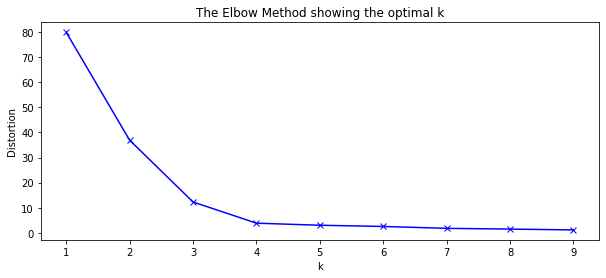

In [63]:
plt.figure(figsize=(10,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
#observations: indeed, appears to be 4 as the optimal k

In [65]:
#examine silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(X, k_means.labels_)
#observations: silhouette coefficient of 0.75 indicates quite good accuracy
#in terms of identifying instances in their proper clusters (close to centroids)

0.7490346189454948

# DBSCAN

In [43]:
#import dbscan algorithm
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.3, min_samples=3)

In [44]:
#now fit the algorithm to our data
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=3, n_jobs=None, p=None)

In [46]:
#view the clusters that each instance has been assigned
dbscan.labels_
#observations: notice some instances were assigned a negative label...these
#have been classified as noise; also notice that the algorithm has assigned
#5 clusters (0,1,2,3,4)

array([-1,  0,  0,  0,  1,  1,  1,  2,  2,  0,  3,  3,  2,  1,  1,  2,  4,
        0,  2,  2,  1,  0,  0,  3,  4, -1,  4,  2,  3,  2,  2,  0,  1,  2,
        0,  0,  3,  4,  1,  3], dtype=int64)

# Hierarchical

In [47]:
#import hierarchical algorithm (scikitlearn doesn't have...use scipy)
from scipy.cluster.hierarchy import linkage
h = linkage(X, method='ward', metric='euclidean')
#in scipy fitting works a bit differently - just call the function (is done above)

In [48]:
#import dendrogram
from scipy.cluster.hierarchy import dendrogram

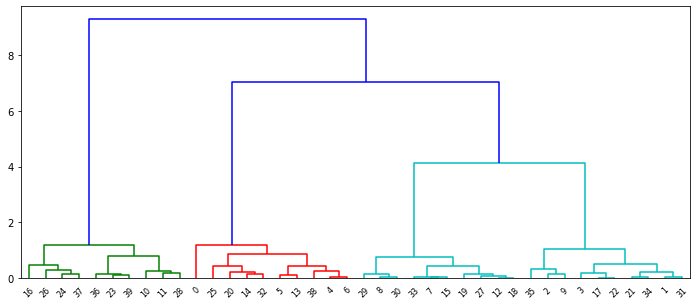

In [49]:
#plot dendrogram
plt.figure(figsize=(12,5));
dendrogram(h);
#observations: 1&31 were merged, then 34 with them, etc. (review notes)

In [50]:
#get cluster assignments for each instance
from scipy.cluster.hierarchy import fcluster

In [52]:
fcluster(h, 4, criterion='maxclust')

array([2, 4, 4, 4, 2, 2, 2, 3, 3, 4, 1, 1, 3, 2, 2, 3, 1, 4, 3, 3, 2, 4,
       4, 1, 1, 2, 1, 3, 1, 3, 3, 4, 2, 3, 4, 4, 1, 1, 2, 1], dtype=int32)

In [53]:
#try with 2 clusters
fcluster(h, 2, criterion='maxclust')

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1], dtype=int32)